In [1]:
import pandas as pd
import numpy as np
import pubchempy as pcp
import plotly.express as px
from scipy import stats
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import plotly.graph_objects as go

In [ ]:
New_data1 = pd.read_csv(r'C:\Users\Igorr\Documents\ITMO5grade\Algorithm_BigData\Merged_data.csv')
# New_data1 = New_data1.drop('Unnamed: 0', axis=1)
display(New_data1)

C:\Users\Igorr\AppData\Local\Temp\ipykernel_12448\3065165579.py:2: DtypeWarning: Columns (31,69,70,71,72,73,74,75,76,77,153,154,155,162,163,164,168,169,170,171,172,173,180,181,182,189,190,191,198,199,200,207,208,209,216,217,218,225,226,227,234,235,236,243,244,245,276,277,278,279,280,281,282,283,284,360,361,362,369,370,371,378,379,380,384,385,386,387,388,389,396,397,398,405,406,407,414,415,416,423,424,425,432,433,434,441,442,443,450,451,452,459,460,461,467,468,469,473,474,475,476,477,481,482,483,484,485,489,490,491,492,493,499,500,501,507,508,509,515,516,517,523,524,525,531,532,533,539,540,541,547,548,549,555,556,557,563,564,565,569,570,571,572,573,577,578,579,580,581,585,586,587,588,589,595,596,597,603,604,605,611,612,613,619,620,621,627,628,629,635,636,637,643,644,645,651,652,653,663,664,694,707,720,733,746,759,772,785,848,874,882,883,884,885,886,887,888,890,898,899,900,901,902,903,904,947,1290,1291,1292,1293,1364,1365,1366,1781,1809,1810,1812,1840) have mixed types. Specify dtype opt

,smiles_code,A,B,C,mu,alpha,homo,lumo,gap,r2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,16167.0,3.18840,0.81811,0.68296,5.2689,76.23,-0.2760,-0.0779,0.1980,1536.2250,...,0,0,0,0,0,0,0,0,0,0
1,7368.0,2.49891,1.84690,1.37865,1.7357,80.46,-0.2519,0.0814,0.3333,1025.3787,...,0,0,0,0,0,0,0,0,0,0
2,12528.0,2.35684,1.74283,1.08466,2.5701,65.19,-0.2421,-0.0289,0.2132,1101.7221,...,0,0,0,0,0,0,0,0,0,0
3,13103.0,4.94611,0.59499,0.55127,6.0816,79.07,-0.2514,-0.0038,0.2477,1953.8524,...,0,0,0,0,0,0,0,0,0,0
4,12623.0,2.55281,1.23863,1.00440,1.5674,83.69,-0.2402,0.0209,0.2612,1232.9278,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5886.0,2.43733,1.98372,1.49510,3.8731,66.31,-0.2675,0.0074,0.2748,926.3863,...,0,0,0,0,0,0,0,0,0,0
19996,16419.0,4.87456,0.91933,0.83894,2.7583,73.64,-0.2434,-0.0465,0.1969,1316.1081,...,0,0,0,0,0,0,0,0,0,0
19997,3795.0,4.51150,0.80861,0.77061,2.5281,69.87,-0.2753,0.0111,0.2863,1465.7955,...,0,0,0,0,0,0,0,0,0,0
19998,2601.0,2.67771,1.95271,1.20948,2.7901,66.61,-0.2625,-0.0269,0.2356,968.9898,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Ячейка 1
# Находим столбцы с типом данных bool
bool_columns = New_data1.select_dtypes(include=['bool']).columns

# Преобразуем значения в числовой формат
New_data1[bool_columns] = New_data1[bool_columns].astype(int)

# # Кодирование SMILES
# label_encoder = LabelEncoder()
# df_cleaned['smiles_encoded'] = label_encoder.fit_transform(df_cleaned['smiles'])
# df_cleaned.drop(columns=['smiles'], axis=1, inplace=True)

# Получение списка колонок с типами данных, отличными от float и int
non_numeric_columns = New_data1.select_dtypes(exclude=['float', 'int']).columns.tolist()

print("Следующие колонки имеют тип данных, отличный от float или int:")
print(non_numeric_columns)


Следующие колонки имеют тип данных, отличный от float или int:
['VR3_A', 'ATS0s', 'ATS1s', 'ATS2s', 'ATS3s', 'ATS4s', 'ATS5s', 'ATS6s', 'ATS7s', 'ATS8s', 'AATS3dv', 'AATS4dv', 'AATS5dv', 'AATS6dv', 'AATS7dv', 'AATS8dv', 'AATS3d', 'AATS4d', 'AATS5d', 'AATS6d', 'AATS7d', 'AATS8d', 'AATS0s', 'AATS1s', 'AATS2s', 'AATS3s', 'AATS4s', 'AATS5s', 'AATS6s', 'AATS7s', 'AATS8s', 'AATS3Z', 'AATS4Z', 'AATS5Z', 'AATS6Z', 'AATS7Z', 'AATS8Z', 'AATS3m', 'AATS4m', 'AATS5m', 'AATS6m', 'AATS7m', 'AATS8m', 'AATS3v', 'AATS4v', 'AATS5v', 'AATS6v', 'AATS7v', 'AATS8v', 'AATS3se', 'AATS4se', 'AATS5se', 'AATS6se', 'AATS7se', 'AATS8se', 'AATS3pe', 'AATS4pe', 'AATS5pe', 'AATS6pe', 'AATS7pe', 'AATS8pe', 'AATS3are', 'AATS4are', 'AATS5are', 'AATS6are', 'AATS7are', 'AATS8are', 'AATS3p', 'AATS4p', 'AATS5p', 'AATS6p', 'AATS7p', 'AATS8p', 'AATS3i', 'AATS4i', 'AATS5i', 'AATS6i', 'AATS7i', 'AATS8i', 'ATSC0s', 'ATSC1s', 'ATSC2s', 'ATSC3s', 'ATSC4s', 'ATSC5s', 'ATSC6s', 'ATSC7s', 'ATSC8s', 'AATSC3c', 'AATSC4c', 'AATSC5c', 'AA

In [5]:
New_data1 = New_data1.drop(columns=non_numeric_columns)
New_data1

,smiles_code,A,B,C,mu,alpha,homo,lumo,gap,r2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,16167.0,3.18840,0.81811,0.68296,5.2689,76.23,-0.2760,-0.0779,0.1980,1536.2250,...,0,0,0,0,0,0,0,0,0,0
1,7368.0,2.49891,1.84690,1.37865,1.7357,80.46,-0.2519,0.0814,0.3333,1025.3787,...,0,0,0,0,0,0,0,0,0,0
2,12528.0,2.35684,1.74283,1.08466,2.5701,65.19,-0.2421,-0.0289,0.2132,1101.7221,...,0,0,0,0,0,0,0,0,0,0
3,13103.0,4.94611,0.59499,0.55127,6.0816,79.07,-0.2514,-0.0038,0.2477,1953.8524,...,0,0,0,0,0,0,0,0,0,0
4,12623.0,2.55281,1.23863,1.00440,1.5674,83.69,-0.2402,0.0209,0.2612,1232.9278,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5886.0,2.43733,1.98372,1.49510,3.8731,66.31,-0.2675,0.0074,0.2748,926.3863,...,0,0,0,0,0,0,0,0,0,0
19996,16419.0,4.87456,0.91933,0.83894,2.7583,73.64,-0.2434,-0.0465,0.1969,1316.1081,...,0,0,0,0,0,0,0,0,0,0
19997,3795.0,4.51150,0.80861,0.77061,2.5281,69.87,-0.2753,0.0111,0.2863,1465.7955,...,0,0,0,0,0,0,0,0,0,0
19998,2601.0,2.67771,1.95271,1.20948,2.7901,66.61,-0.2625,-0.0269,0.2356,968.9898,...,0,0,0,0,0,0,0,0,0,0


In [6]:
New_data1.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1287 columns):
 #     Column                    Non-Null Count  Dtype  
---    ------                    --------------  -----  
 0     smiles_code               20000 non-null  float64
 1     A                         20000 non-null  float64
 2     B                         20000 non-null  float64
 3     C                         20000 non-null  float64
 4     mu                        20000 non-null  float64
 5     alpha                     20000 non-null  float64
 6     homo                      20000 non-null  float64
 7     lumo                      20000 non-null  float64
 8     gap                       20000 non-null  float64
 9     r2                        20000 non-null  float64
 10    zpve                      20000 non-null  float64
 11    u0                        20000 non-null  float64
 12    u298                      20000 non-null  float64
 13    h298                      2

In [7]:
# Поиск NaN значений в датасете
nan_values = New_data1.isnull().sum().sum()

if nan_values > 0:
    print("В датасете есть NaN значения.")
    print("Количество NaN значений:", nan_values)
    print("Индексы строк с NaN значениями:")
    print(New_data1[New_data1.isna().any(axis=1)].index.tolist())
else:
    print("В датасете нет NaN значений.")


В датасете есть NaN значения.
Количество NaN значений: 159976
Индексы строк с NaN значениями:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 

In [8]:
New_data1 = New_data1.dropna(axis=1)

In [9]:
# Поиск NaN значений в датасете
nan_values = New_data1.isnull().sum().sum()

if nan_values > 0:
    print("В датасете есть NaN значения.")
    print("Количество NaN значений:", nan_values)
    print("Индексы строк с NaN значениями:")
    print(New_data1[New_data1.isna().any(axis=1)].index.tolist())
else:
    print("В датасете нет NaN значений.")


В датасете нет NaN значений.


In [10]:
New_data1

,smiles_code,A,B,C,mu,alpha,homo,lumo,gap,r2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,16167.0,3.18840,0.81811,0.68296,5.2689,76.23,-0.2760,-0.0779,0.1980,1536.2250,...,0,0,0,0,0,0,0,0,0,0
1,7368.0,2.49891,1.84690,1.37865,1.7357,80.46,-0.2519,0.0814,0.3333,1025.3787,...,0,0,0,0,0,0,0,0,0,0
2,12528.0,2.35684,1.74283,1.08466,2.5701,65.19,-0.2421,-0.0289,0.2132,1101.7221,...,0,0,0,0,0,0,0,0,0,0
3,13103.0,4.94611,0.59499,0.55127,6.0816,79.07,-0.2514,-0.0038,0.2477,1953.8524,...,0,0,0,0,0,0,0,0,0,0
4,12623.0,2.55281,1.23863,1.00440,1.5674,83.69,-0.2402,0.0209,0.2612,1232.9278,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5886.0,2.43733,1.98372,1.49510,3.8731,66.31,-0.2675,0.0074,0.2748,926.3863,...,0,0,0,0,0,0,0,0,0,0
19996,16419.0,4.87456,0.91933,0.83894,2.7583,73.64,-0.2434,-0.0465,0.1969,1316.1081,...,0,0,0,0,0,0,0,0,0,0
19997,3795.0,4.51150,0.80861,0.77061,2.5281,69.87,-0.2753,0.0111,0.2863,1465.7955,...,0,0,0,0,0,0,0,0,0,0
19998,2601.0,2.67771,1.95271,1.20948,2.7901,66.61,-0.2625,-0.0269,0.2356,968.9898,...,0,0,0,0,0,0,0,0,0,0


Удаление колонок gap и smiles_code для нахождения лишних колонок, с помощью корреляции Пирсона

In [11]:
# Удаление столбцов с нулевой вариацией
New_data1 = New_data1.loc[:, New_data1.describe().loc['std'] > 0]

# Вывод информации о DataFrame после удаления столбцов
New_data1.info()

Dataforcorr = New_data1.drop(columns=['gap','smiles_code'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 1060 entries, smiles_code to fr_urea
dtypes: float64(833), int64(227)
memory usage: 161.7 MB


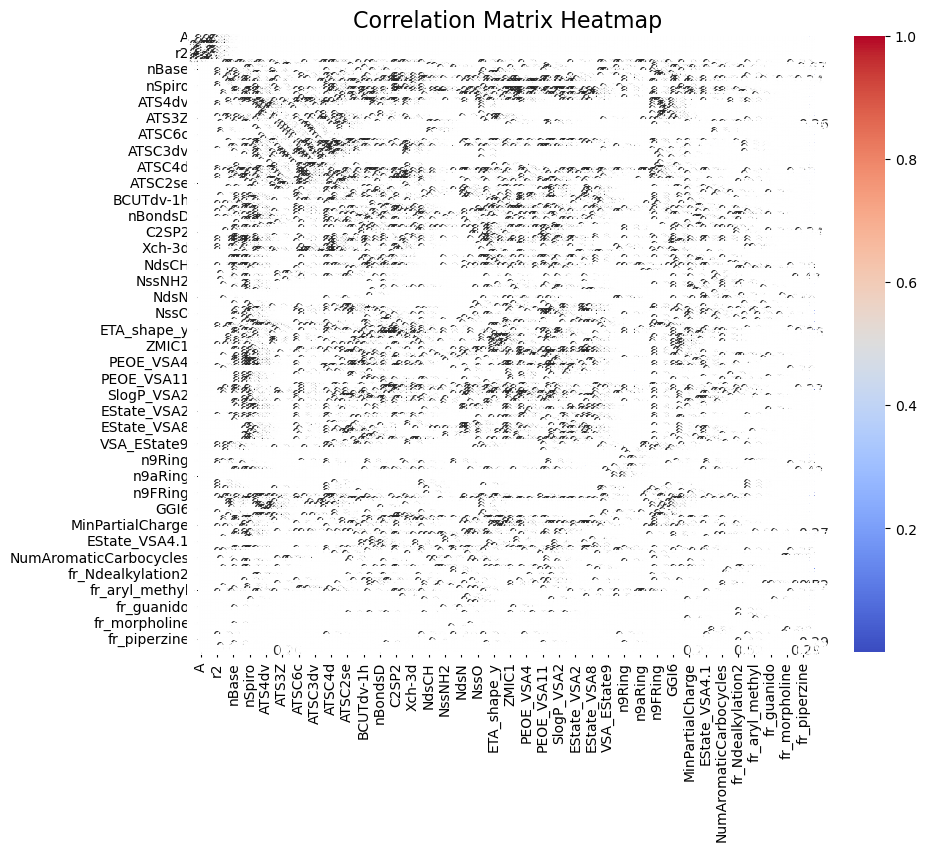

In [ ]:
# Создаем матрицу корреляций
corr_matrix = Dataforcorr.corr().abs()

# # Настройка размеров фигуры
# plt.figure(figsize=(10, 8))

# # Построение тепловой карты
# sns.heatmap(
#     corr_matrix,
#     annot=True,          # Добавление значений корреляции в ячейки
#     fmt=".2f",           # Формат значений
#     cmap="coolwarm",     # Цветовая палитра
#     cbar=True,           # Отображение цветовой шкалы
#     square=True          # Квадратные ячейки
# )

# # Добавление заголовка
# plt.title("Correlation Matrix Heatmap", fontsize=16)

# # Отображение графика
# plt.show()

In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features
Dataforcorr.drop(to_drop, axis=1, inplace=True)

In [18]:
New_data2 = Dataforcorr

In [19]:
columns_to_add = ['gap', 'smiles_code']

# Выбираем только необходимые столбцы из df2
New_data1_selected = New_data1[columns_to_add]

# Объединяем df1 и df2_selected по индексу (или по определенному столбцу, если он у вас есть)
# Предположим, что оба датасета имеют общий индекс или столбец 'ID', если нет - укажите параметр 'on'
New_data2 = pd.merge(New_data2, New_data1_selected, left_index=True, right_index=True)  # по индексу

In [20]:
New_data2 = New_data2.drop_duplicates()
New_data2

,A,B,mu,alpha,homo,lumo,r2,zpve,u0,cv,...,fr_para_hydroxylation,fr_phenol,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_tetrazole,fr_urea,gap,smiles_code
0,3.18840,0.81811,5.2689,76.23,-0.2760,-0.0779,1536.2250,0.087848,-415.556589,29.286,...,0,0,0,0,0,0,0,0,0.1980,16167.0
1,2.49891,1.84690,1.7357,80.46,-0.2519,0.0814,1025.3787,0.184554,-387.077518,31.170,...,0,0,0,0,0,0,0,0,0.3333,7368.0
2,2.35684,1.74283,2.5701,65.19,-0.2421,-0.0289,1101.7221,0.149467,-422.068714,34.081,...,0,0,0,0,0,0,0,0,0.2132,12528.0
3,4.94611,0.59499,6.0816,79.07,-0.2514,-0.0038,1953.8524,0.146162,-435.260337,35.231,...,0,0,0,0,0,0,0,0,0.2477,13103.0
4,2.55281,1.23863,1.5674,83.69,-0.2402,0.0209,1232.9278,0.131554,-384.590827,35.750,...,0,0,0,0,0,0,0,0,0.2612,12623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2.43733,1.98372,3.8731,66.31,-0.2675,0.0074,926.3863,0.137621,-459.015765,28.503,...,0,0,0,0,0,0,0,0,0.2748,5886.0
19996,4.87456,0.91933,2.7583,73.64,-0.2434,-0.0465,1316.1081,0.122828,-437.854622,29.819,...,0,0,0,0,0,0,0,0,0.1969,16419.0
19997,4.51150,0.80861,2.5281,69.87,-0.2753,0.0111,1465.7955,0.116722,-362.642739,31.269,...,0,0,0,0,0,0,0,0,0.2863,3795.0
19998,2.67771,1.95271,2.7901,66.61,-0.2625,-0.0269,968.9898,0.118482,-396.011151,29.039,...,0,0,0,0,0,0,0,0,0.2356,2601.0


In [22]:
New_data2.to_csv(r'C:\Users\Igorr\Documents\ITMO5grade\Algorithm_BigData\Merged_data2.csv', index=False)